##Understanding K-Means Clustering using sklearn Package

Lets take an example with marks of 22 students for 2 subjects.

**The problem is to find groups of excellent and under performing students.**


Visualize and understand the intput data

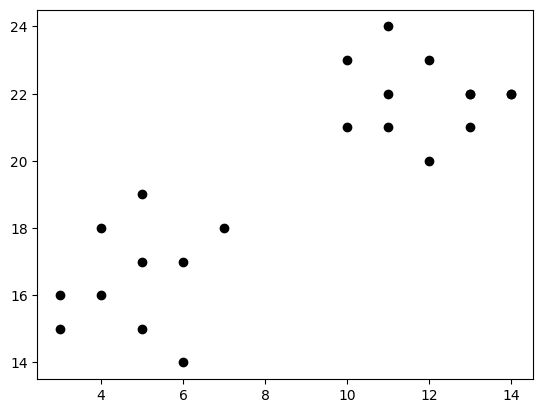

In [1]:
import matplotlib.pyplot as plt

x = [ 5,  4, 13, 11, 13,  5,  3,  4,  3, 10, 12, 13, 14, 12, 11,  6,  7,  6,  5, 11, 14, 10]
y = [15, 18, 22, 21, 21, 19, 15, 16, 16, 21, 23, 22, 22, 20, 22, 17, 18, 14, 17, 24, 22, 23]

plt.scatter(x, y, color='black')
plt.show()

Data processing

In [2]:
data = list(zip(x, y))
print(data)

[(5, 15), (4, 18), (13, 22), (11, 21), (13, 21), (5, 19), (3, 15), (4, 16), (3, 16), (10, 21), (12, 23), (13, 22), (14, 22), (12, 20), (11, 22), (6, 17), (7, 18), (6, 14), (5, 17), (11, 24), (14, 22), (10, 23)]


The K-Means Clustering

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, n_init = 'auto')
kmeans.fit(data)

c = kmeans.labels_
print(c)

[0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1]


Visualize the clusters

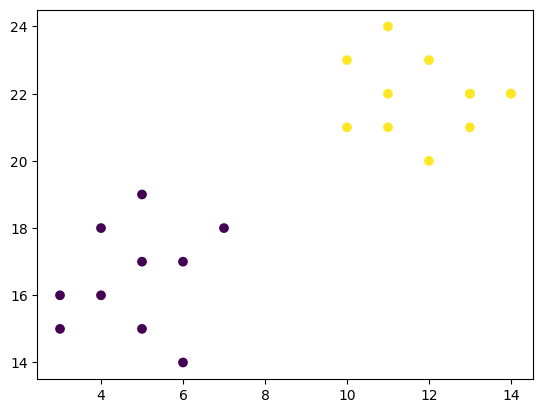

In [8]:
plt.scatter(x, y, c = kmeans.labels_)
plt.show()

**Cluster Evaluation without Ground-Truth**

**Silhouette Coefficient**

The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

  1. The score is bounded between -1 for incorrect clustering and  +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

  2. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

  3. The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [9]:
from sklearn import metrics

metrics.silhouette_score(data, c, metric = 'euclidean')

0.7214539689632106

**Calinski-Harabasz Index**

Also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

  1. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

  2. The score is fast to compute.

  3. The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [10]:
metrics.calinski_harabasz_score(data, c)

121.287792326368

**Davies-Bouldin Index**

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

1. Zero is the lowest possible score. Values closer to zero indicate a better partition.

2. The computation of Davies-Bouldin is simpler than that of Silhouette scores.

3. The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances

4. The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

5. The usage of centroid distance limits the distance metric to Euclidean space.

In [11]:
metrics.davies_bouldin_score(data, c)

0.38191565365304037

In [14]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []             # SSE / WCSS

for i in range (1, 11):
  kmeans = KMeans(n_clusters = i, n_init = 'auto')
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

print(inertias)

[515.8181818181818, 73.01666666666667, 56.599999999999994, 34.099999999999994, 27.433333333333337, 21.666666666666664, 14.666666666666668, 13.166666666666666, 12.666666666666666, 9.5]


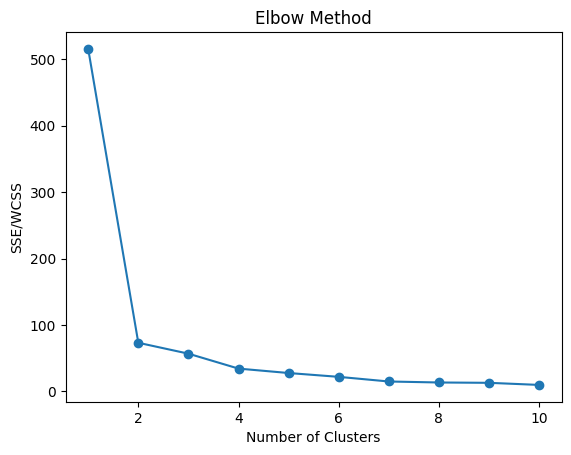

In [15]:
plt.plot (range(1, 11), inertias, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE/WCSS')
plt.show()

#Lets check another example.

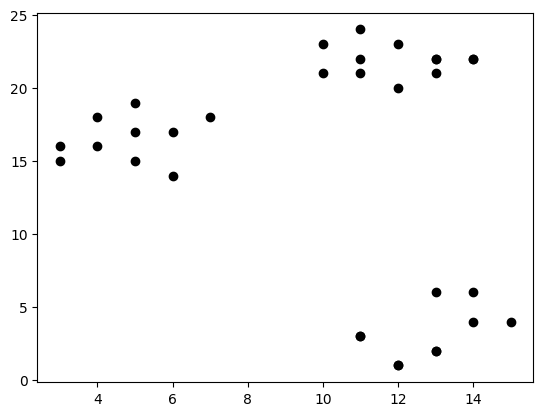

In [34]:
import matplotlib.pyplot as plt

x = [ 5,  4, 13, 11, 13,  5,  3,  4,  3, 10, 12, 13, 14, 12, 11,  6,  7,  6,  5, 11, 14, 10, 12, 13, 14, 12, 11, 13, 11, 13, 14, 15]
y = [15, 18, 22, 21, 21, 19, 15, 16, 16, 21, 23, 22, 22, 20, 22, 17, 18, 14, 17, 24, 22, 23,  1,  2,  4,  1,  3,  6,  3,  2,  6,  4]

plt.scatter(x, y, color = 'black')
plt.show()

In [35]:
from sklearn.cluster import KMeans

data = list(zip(x, y))

kmeans = KMeans(n_clusters = 3, n_init = 'auto')
kmeans.fit(data)

c=kmeans.labels_
print(c)


[0 0 2 2 2 0 0 0 0 2 2 2 2 2 2 0 0 0 0 2 2 2 1 1 1 1 1 1 1 1 1 1]


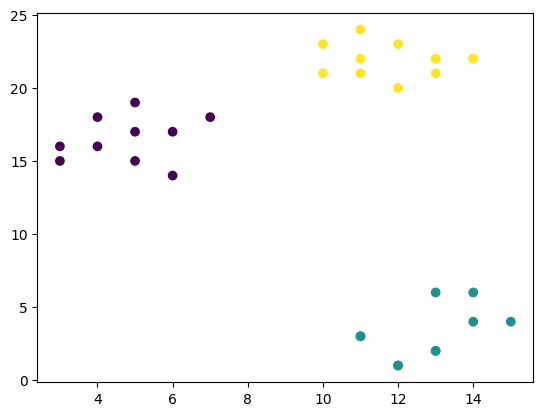

In [36]:
plt.scatter(x, y, c = kmeans.labels_)
plt.show()

In [37]:
metrics.silhouette_score(data, c, metric = 'euclidean')

0.7508793049516054

In [38]:
metrics.calinski_harabasz_score(data, c)

291.097772451713

In [39]:
metrics.davies_bouldin_score(data, c)

0.337347487041704

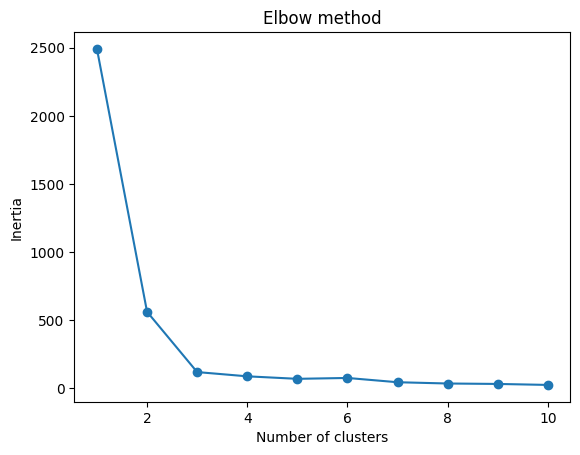

In [40]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init = 'auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Difficult to determine K (the number of clusters)?

Let's make the problem little difficult and real !!

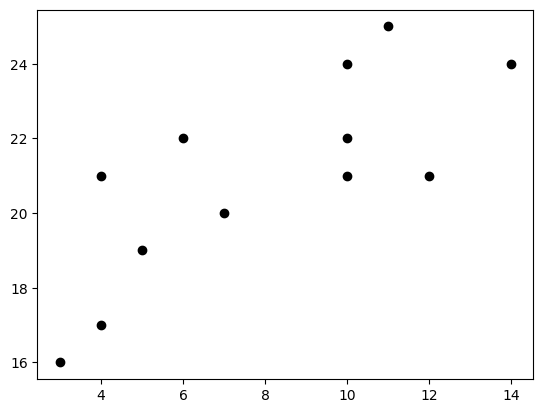

In [41]:
import matplotlib.pyplot as plt

x = [ 4,  5, 10,  4,  3, 11, 14 , 6, 10, 12,  7, 10]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 20, 22]

plt.scatter(x, y, color = 'black')
plt.show()

The ELBOW method

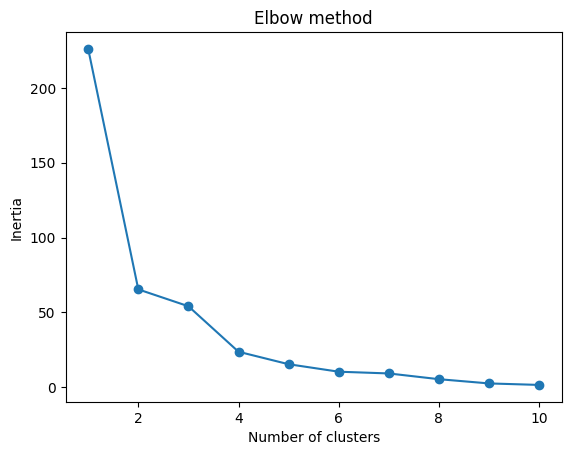

In [42]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init = 'auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [43]:
from sklearn.cluster import KMeans

data = list(zip(x, y))

kmeans = KMeans(n_clusters = 2, n_init = 'auto')
kmeans.fit(data)

c=kmeans.labels_
print(c)

[0 0 1 0 0 1 1 0 1 1 0 1]


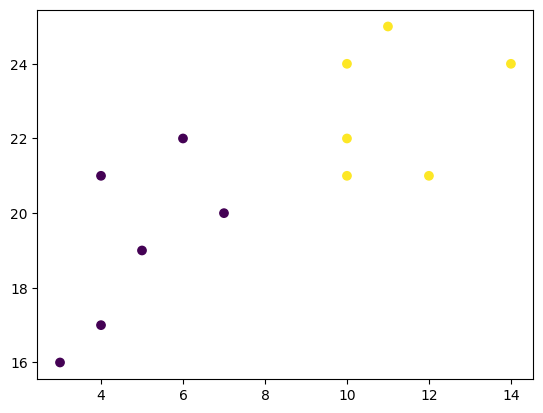

In [44]:
plt.scatter(x, y, c = kmeans.labels_)
plt.show()

In [45]:
from sklearn import metrics

metrics.silhouette_score(data, c, metric = 'euclidean')

0.5417840060343528

#Clustering data with higher-dimentions

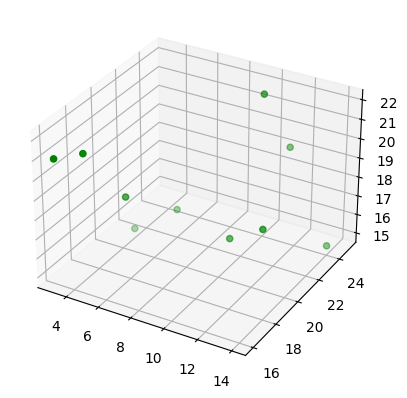

In [46]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
z = [15, 18, 22, 21, 21, 19, 15, 16, 16, 17]

from mpl_toolkits import mplot3d
ax = plt.axes(projection = "3d")

ax.scatter3D(x, y, z, color = "green")
plt.show()

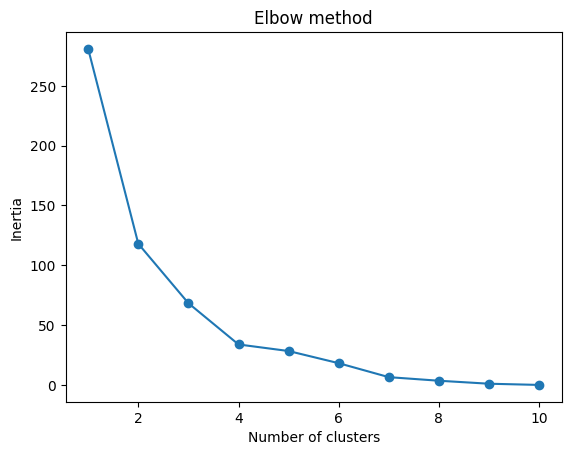

In [47]:
from sklearn.cluster import KMeans

data = list(zip(x, y, z))
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init = 'auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [53]:
from sklearn.cluster import KMeans

data = list(zip(x, y, z))

kmeans = KMeans(n_clusters = 2, n_init = 'auto')
kmeans.fit(data)

c = kmeans.labels_
print(c)

[1 1 0 1 1 0 0 1 0 0]


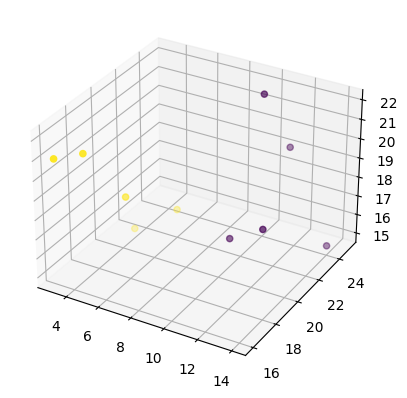

In [55]:
ax = plt.axes(projection = "3d")
ax.scatter3D(x, y, z, c = kmeans.labels_)
plt.show()

#Cluster Evaluation without Ground-Truth

In [56]:
metrics.silhouette_score(data, c, metric = 'euclidean')

0.428585111938997

In [57]:
metrics.calinski_harabasz_score(data, c)

11.044067796610168

In [58]:
metrics.davies_bouldin_score(data, c)

0.8027808253784411